# Acquire Free Financial Market Data with Cutting-Edge Python Libraries

In this chapter, the goal is to cover:
1. Diving into continuous futures data with Nasdaq Data Link
2. Exploring S&P500 ratios data with Nasdaq Data Link
3. Working with stock market data with the OpenBB Platform
4. Fetching historic futures data with the OpenBB Platform 
5. Navigating options market with the OpenBB Platform 
6. Harnessing factor data using pandas_datareader


In [5]:
# installing OpenBB Platform with all extensions and providers using pip
!pip install "openbb[all]" --quiet # hides logs

In [7]:
# Accesing continuous contract data for 600 futures contracts from CME, ICE, LIFFE and other exchanges
!pip install nasdaq-data-link --quiet

In [10]:
# importing the API key from Creds.py
import creds

In [15]:
# importing nasdaqdatalink and configuring our API key
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = creds.api_key

In [23]:
import nasdaqdatalink
data = nasdaqdatalink.get_table('ZACKS/FC', ticker='AAPL')

In [61]:
data.head()

,m_ticker,ticker,comp_name,comp_name_2,exchange,currency_code,per_end_date,per_type,per_code,per_fisc_year,...,stock_based_compsn_qd,cash_flow_oper_activity_qd,net_change_prop_plant_equip_qd,comm_stock_div_paid_qd,pref_stock_div_paid_qd,tot_comm_pref_stock_div_qd,wavg_shares_out,wavg_shares_out_diluted,eps_basic_net,eps_diluted_net
None,,,,,,,,,,,,,,,,,,,,,
0,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-12-31,Q,None,2019,...,1559.0,26690.0,-3355.0,-3568.0,None,-3568.0,18943.28,19093.01,1.0550,1.0450
1,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-09-30,Q,None,2018,...,1345.0,19523.0,-3041.0,-3530.0,None,-3530.0,19821.51,20000.44,0.7425,0.7400
2,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-06-30,Q,None,2018,...,1351.0,14488.0,-3267.0,-3653.0,None,-3653.0,19528.67,19706.44,0.5900,0.5850
3,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-03-31,Q,None,2018,...,1348.0,15130.0,-4195.0,-3190.0,None,-3190.0,20099.51,20273.97,0.6875,0.6825
4,AAPL,AAPL,Apple,Apple Inc.,NASDAQ,USD,2018-09-30,A,None,2018,...,NaN,NaN,NaN,NaN,None,NaN,19821.51,20000.44,3.0000,2.9800


In [64]:
data = nasdaqdatalink.get_table('QDL/FON',contract_code='967654', date='2019-10-08,2019-10-01,2019-09-24')
data.head()

,contract_code,type,date,market_participation,producer_merchant_processor_user_longs,producer_merchant_processor_user_shorts,swap_dealer_longs,swap_dealer_shorts,swap_dealer_spreads,money_manager_longs,money_manager_shorts,money_manager_spreads,other_reportable_longs,other_reportable_shorts,other_reportable_spreads,total_reportable_longs,total_reportable_shorts,non_reportable_longs,non_reportable_shorts
None,,,,,,,,,,,,,,,,,,,
0,967654,F_OTR_OI,2019-10-08,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,967654,F_OTR_OI,2019-10-01,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,967654,F_OTR_OI,2019-09-24,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,967654,F_OTR_NT,2019-10-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,967654,F_OTR_NT,2019-10-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [44]:
help(nasdaqdatalink.get_table)

Help on function get_table in module nasdaqdatalink.get_table:

get_table(datatable_code, **options)



# Working with stock market data with the OpenBB Platform

In [45]:
from openbb import obb

Extensions to add: alpha_vantage@1.3.3, biztoc@1.3.3, cboe@1.3.3, ecb@1.3.3, econometrics@1.4.3, finra@1.3.3, finviz@1.2.3, government_us@1.3.3, multpl@1.0.3, nasdaq@1.3.3, openbb_charting@2.2.3, quantitative@1.3.3, seeking_alpha@1.3.3, stockgrid@1.3.3, technical@1.3.3, tmx@1.2.3, tradier@1.2.3, wsj@1.3.3

Building...


In [46]:
obb.user.preferences.output_type = 'dataframe'

In [59]:
# we can use 'historical' method in order to download price data for AAPL
df_daily = obb.equity.price.historical(symbol="aapl")
df_daily.head(3)

,open,high,low,close,volume
date,,,,,
2004-01-02,0.39,0.39,0.38,0.38,2024993600
2004-01-05,0.38,0.40,0.38,0.40,5530257600
2004-01-06,0.40,0.40,0.39,0.40,7130872000


In [60]:
top_crypto= ['ADA-USD', 'BNB-USD', 'BTC-USD', 'DOT-USD', 'ETH-USD', 'LTC-USD','MATIC-USD', 'SOL-USD', 'TRX-USD', 'XRP-USD']

ohlc_data= obb.crypto.price.historical(top_crypto, provider="yfinance", interval='1d', start_date='2023-10-01', end_date='2024-10-01')
ohlc_data.head(3)

,open,high,low,close,volume,symbol
date,,,,,,
2023-10-01,0.254043,0.267471,0.254019,0.265895,1.650882e+08,ADA-USD
2023-10-01,214.800323,219.133835,213.506516,218.047134,3.874081e+08,BNB-USD
2023-10-01,26967.396484,28047.238281,26965.093750,27983.750000,9.503917e+09,BTC-USD


In [67]:
df_daily = obb.equity.price.historical(
    symbol="spy", start_date="1990-01-01", provider="cboe")
df_daily.head(1)

,open,high,low,close,volume
date,,,,,
2004-01-02,111.74,112.19,110.73,111.23,38072300


In [68]:
# in order to change for providers, which require API keys (either free of paid), we may configure them in OpenBB Hub.

In [71]:
# we can not only use OpenBB Platform to download fundamental data, but it can also concatenate it in a single df for further analysis
# this code snippet would provide us with balance sheet metrics for Apple and Microsoft
obb.equity.fundamental.metrics("AAPL,MSFT").transpose()

,0,1
symbol,AAPL,MSFT
market_cap,3586040000000.0,3177700000000.0
pe_ratio,35.91,36.23
foward_pe,31.79,27.87
eps,6.57,11.8
price_to_sales,9.3,12.96
price_to_book,53.82,11.84
book_value_per_share,4.38,36.11
price_to_cash,58.03,42.06
cash_per_share,4.06,10.16


### Building stock screeners

In [2]:
from openbb import obb

In [4]:
stock_screener = obb.equity.compare.groups(
    group = "industry",
    metric = "valuation",
    provider = "finviz")

In [6]:
stock_screener

OBBject

id: 06718dd7-8a8e-7991-8000-4a6cc2b256c1
results: [{'name': 'Pharmaceutical Retailers', 'stocks': None, 'market_cap': 881000...
provider: finviz
warnings: None
chart: None
extra: {'metadata': {'arguments': {'provider_choices': {'provider': 'finviz'}, 'sta...

In [11]:
# converting result to pandas dataframe
df = stock_screener.to_dataframe() #it is allowed to use its alias to_df()
df.head()

,name,market_cap,performance_1d,forward_pe,eps_growth_past_5y,eps_growth_next_5y,volume,price_to_sales,price_to_book,price_to_cash,price_to_free_cash_flow,sales_growth_past_5_years,pe,peg
0,Pharmaceutical Retailers,8810000000,-0.0650,6.49,-0.0600,0.0372,39180000,0.06,0.82,2.74,463.09,0.0529,NaN,NaN
1,Insurance - Reinsurance,50030000000,-0.0071,7.14,0.5536,0.0349,1610000,0.94,1.28,NaN,2.80,0.2232,6.89,1.97
2,REIT - Mortgage,57540000000,-0.0083,7.49,-0.2230,0.0379,64340000,1.96,0.86,4.09,6.61,0.3553,17.34,4.58
3,Marine Shipping,37170000000,-0.0093,7.80,0.2173,0.2043,12310000,1.24,1.05,5.86,8.75,0.2455,5.83,0.29
4,Coking Coal,9770000000,-0.0041,7.86,0.0570,0.0637,2020000,0.92,1.59,6.76,9.23,0.1548,7.96,1.25


In [15]:
# create a screener that returns the top gainers from tech (based on a preset)
best_tech = obb.equity.compare.groups(
    group = "technology",
    metric = "performance",
    provider = "finviz").to_df()

In [16]:
best_tech

,name,performance_1d,performance_1w,performance_1m,performance_3m,performance_6m,performance_1y,performance_ytd,analyst_recommendation,volume,volume_average,volume_relative
0,Semiconductor Equipment & Materials,0.0005,-0.0290,-0.0818,-0.1548,-0.1200,0.2843,0.0085,1.75,37410000,41160000,0.91
1,Scientific & Technical Instruments,-0.0148,-0.0237,-0.0060,0.0291,0.0719,0.3083,0.1064,2.17,23280000,26210000,0.89
2,Solar,0.0188,-0.0130,-0.1836,-0.1721,-0.1558,-0.2563,-0.3724,1.83,46640000,53490000,0.87
3,Computer Hardware,-0.0294,-0.0112,0.0264,0.0165,0.1402,0.7379,0.4480,1.95,123130000,136700000,0.90
4,Electronics & Computer Distribution,-0.0073,-0.0055,0.0154,0.0493,0.0916,0.3072,0.1302,2.55,2089999,2160000,0.97
5,Software - Application,-0.0022,-0.0016,0.0394,0.1199,0.0964,0.3681,0.1097,1.82,423530000,387070000,1.09
6,Information Technology Services,-0.0046,-0.0007,0.0504,0.1412,0.2055,0.4133,0.1961,2.16,79520000,86930000,0.91
7,Electronic Components,-0.0024,0.0062,0.0251,0.0293,0.1794,0.4418,0.2331,1.90,30330000,36920000,0.82
8,Consumer Electronics,-0.0026,0.0086,0.0413,0.0786,0.4113,0.3634,0.2239,1.90,47330000,67390000,0.70
9,Software - Infrastructure,0.0126,0.0111,0.0028,0.0447,0.0963,0.3306,0.1505,1.57,274340000,335620000,0.82


### Creating a screener that presents an overview grouped by sector

In [20]:
overview_by_sector = obb.equity.compare.groups(
    group = "sector",
    metric = "overview",
    provider = "finviz")

In [22]:
overview_by_sector.to_df()

,name,market_cap,performance_1d,dividend_yield,pe,forward_pe,peg,float_short,volume,Stocks
0,Industrials,5806180000000,-0.0112,0.0133,26.74,20.90,2.27,0.0440,704000000,662
1,Utilities,1661180000000,-0.0039,0.0289,22.08,16.90,2.33,0.0202,188070000,113
2,Healthcare,8369990000000,-0.0023,0.0147,38.99,19.22,2.83,0.0457,2620000000,1182
3,Consumer Cyclical,7712730000000,-0.0018,0.0090,24.26,19.55,1.72,0.0464,1420000000,571
4,Financial,11838300000000,-0.0017,0.0197,16.99,14.58,1.53,0.0126,882700000,932
5,Basic Materials,2162960000000,-0.0015,0.0217,24.95,15.51,2.32,0.0215,478580000,272
6,Technology,21213410000000,-0.0002,0.0064,43.12,27.11,2.23,0.0284,1640000000,786
7,Energy,3513420000000,0.0008,0.0457,11.64,11.31,1.70,0.0284,380440000,253
8,Real Estate,1703930000000,0.0014,0.0359,38.90,32.90,5.59,0.0453,253400000,267
9,Communication Services,8064870000000,0.0036,0.0084,24.84,18.58,1.35,0.0237,486990000,261


## Fetching historic futures data with OpenBB Platform

we use continuous futures data for backtesting trading strategies. 
Usually traders use the roll from one contract to another as a potential opportunity for profit.
The BASIS TRADE is persistently one of the most popular trading strategies for futures traders. 

In [25]:
import pandas as pd
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [26]:
# downloading the current futures curve from CBOE (Chicago Board Options Exchange)
data = obb.derivatives.futures.curve(symbol="VX")

In [27]:
data

,expiration,price
0,2024-11,18.30
1,2024-12,17.90
2,2025-01,18.25
3,2025-02,18.20
4,2025-03,18.30
5,2025-04,18.40
6,2025-05,18.55
7,2025-06,18.60
8,2025-07,20.15


<Axes: xlabel='expiration'>

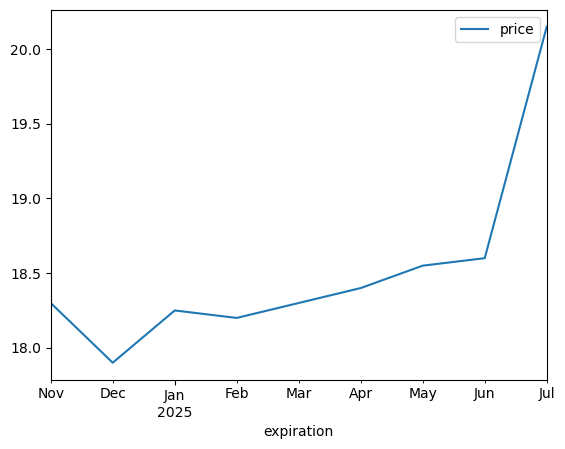

In [36]:
# updating the df index to expiration dates and plot the settlement prices
data.index = pd.to_datetime(data.expiration)
data.plot()

In [44]:
expirations = ["2024-12","2025-12","2026-12","2027-12","2028-12","2029-12","2030-12"]

## Navigating Options Market with the OpenBB Platform

Problem to overcome: a single underlying stock can have an array of options contracts with different combinations of strike prices and expiration dates. Collecting and manipulating this data is a challenge. 

In [45]:
from openbb import obb
obb.user.preferences.output_type = "dataframe"

In [47]:
# the combination of options contracts for all strikes and expiration dates is commonly referred to as "options chain"
chains = obb.derivatives.options.chains(symbol="SPY")

In [48]:
chains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9262 entries, 0 to 9261
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   underlying_symbol   9262 non-null   object        
 1   underlying_price    9262 non-null   float64       
 2   contract_symbol     9262 non-null   object        
 3   expiration          9262 non-null   object        
 4   dte                 9262 non-null   int64         
 5   strike              9262 non-null   float64       
 6   option_type         9262 non-null   object        
 7   open_interest       9262 non-null   int64         
 8   volume              9262 non-null   int64         
 9   theoretical_price   9262 non-null   float64       
 10  last_trade_price    9262 non-null   float64       
 11  last_trade_time     7543 non-null   datetime64[ns]
 12  tick                9262 non-null   object        
 13  bid                 9262 non-null   float64     

## Harnessing factor data using pandas_datareader

In [50]:
import pandas_datareader as pdr

In [51]:
factors = pdr.get_data_famafrench("F-F_Research_Data_Factors")

/var/folders/zw/4sk33jrx1zs31dzjqtgyrm1c0000gn/T/ipykernel_34324/2643818942.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench("F-F_Research_Data_Factors")
/var/folders/zw/4sk33jrx1zs31dzjqtgyrm1c0000gn/T/ipykernel_34324/2643818942.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = pdr.get_data_famafrench("F-F_Research_Data_Factors")


In [52]:
factors["DESCR"]

'F-F Research Data Factors\n-------------------------\n\nThis file was created by CMPT_ME_BEME_RETS using the 202408 CRSP database. The 1-month TBill rate data until 202405 are from Ibbotson Associates. Starting from 202406, the 1-month TBill rate is from ICE BofA US 1-Month Treasury Bill Index. Copyright 2024 Eugene F. Fama and Kenneth R. French\n\n  0 : (59 rows x 4 cols)\n  1 : Annual Factors: January-December (5 rows x 4 cols)'

In [53]:
factors[0].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2019-10,2.06,0.29,-1.90,0.16
2019-11,3.88,0.78,-1.99,0.12
2019-12,2.77,0.73,1.78,0.14
2020-01,-0.11,-3.13,-6.25,0.13
2020-02,-8.13,1.07,-3.80,0.12


The three factors are as follows:
1. Small Minus Big, which represents the differential between the average returns of three small cap portfolios and three large cap portfolios
2. High Minus Low, which quantifies the difference in average returns between two value-oriented portfolios and two growth oriented portfolios 
3. Rm-Rf, which denotes the market excess return over the risk-free rate (the so-called MARKET RISK PREMIUM)

In [55]:
# inspecting annual factor data
factors[1].head()

,Mkt-RF,SMB,HML,RF
Date,,,,
2019,28.28,-6.13,-10.37,2.15
2020,23.66,12.72,-46.10,0.45
2021,23.57,-3.78,25.39,0.04
2022,-21.58,-7.04,25.97,1.43
2023,21.68,-3.29,-13.70,4.95
